In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn #(version == 1.2.2)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from collections import Counter
%matplotlib inline

In [32]:
X_train = pd.read_pickle(r"C:\Users\JosephMoffatt\OneDrive - Thought Logic\Desktop\GitHubRepos\RefurbishedCode\911Project\processed_datasets\x_train.pkl")
y_train = pd.read_pickle(r"C:\Users\JosephMoffatt\OneDrive - Thought Logic\Desktop\GitHubRepos\RefurbishedCode\911Project\processed_datasets\y_train.pkl")
X_test = pd.read_pickle(r"C:\Users\JosephMoffatt\OneDrive - Thought Logic\Desktop\GitHubRepos\RefurbishedCode\911Project\processed_datasets\x_test.pkl")
y_test = pd.read_pickle(r"C:\Users\JosephMoffatt\OneDrive - Thought Logic\Desktop\GitHubRepos\RefurbishedCode\911Project\processed_datasets\y_test.pkl")

In [33]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Lets talk about the parameters of the model that the Decision Classifier is using based on the conditions of the data
- Criterion: The function to measure the quality of a split. In this case, it is set to 'gini', which is a common choice for classification tasks. So Gini Impurity measures the probability that a randomly chosen sample from a node is incorrectly classified based on the labels in that node; faster to compute that normal entropy

- Max Depth: The maximum depth of the tree. A value of None means nodes are expanded; No limit on the nodes, could be both good and bad because the nodes could get a little too specific, which can lead to overfitting (a model trait that every DS tries to avoid)***

- max_depth=None means that the tree can grow until all leaves are pure or until all leaves contain less than min_samples_split samples. This is self exaplantory, but this just lets the tree grow until we get pure nodes

- min_samples_split=2 means that a node must have at least 2 samples to be split into another node (or to keep going until its a pure node)***

- class_weight='balanced' means that the class weights are automatically adjusted to balance the classes in the dataset, which is useful when dealing with imbalanced datasets. As of now I dont know how imbalanced the dataset is; if its unbalanced alot, then we need to remedy it.****

- max_features=None means that the number of features to consider when looking for the best split is not limited, allowing the model to use all available features. This, again, can be good or bad because some of the features may not be relevant for prediction and some may not be relevant

- max_leaf_nodes=None means that the number of leaf nodes in the tree is not limited, allowing the model to grow freely

- ccp_alpha=0.0 means that no pruning is applied to the tree, which can help prevent overfitting (This removes branches that don't really have that much power)***

- monotonic_cst=None means that no monotonic constraints are applied to the tree, allowing the model to learn any relationship between features and target variable.***

In [34]:
feature_importants = clf.feature_importances_
feature_importants_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importants
}).sort_values(by='Importance', ascending=False)

In [35]:
# Create Plotly bar plot
fig = px.bar(
    feature_importants_df,
    x='Feature',
    y='Importance',
    title='Feature Importance for DecisionTreeClassifier',
    labels={'Importance': 'Feature Importance', 'Feature': 'Feature Name'},
    color='Importance',
    color_continuous_scale='Viridis'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Feature",
    yaxis_title="Importance",
    xaxis_tickangle=45,
    showlegend=False,
    template='plotly_dark'  # Use 'plotly' for light theme if preferred
)

# Show plot
fig.show()

#### From the chart depicted above, we can see that longitude and latitude are the two most important features that the DecisionTreeClassifier uses. ZIP code is seemingly not an important factor, which is interesting because ZIP code is a 'location' parameter, and I thought it would be pertinant to this model, but I guess not.

In [36]:
train_sizes, train_scores, val_scores = learning_curve(
    clf,
    X_train, y_train, cv=5, scoring='f1_macro'
)

In [37]:
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

In [38]:
data = pd.DataFrame({
    'Training Size': train_sizes,
    'Training F1': train_scores_mean,
    'Validation F1': val_scores_mean
})

In [39]:
# Create Plotly figure
fig = go.Figure()

# Add Training F1 line
fig.add_trace(
    go.Scatter(
        x=data['Training Size'],
        y=data['Training F1'],
        mode='lines+markers',
        name='Training F1',
        line=dict(color='rgb(54, 162, 235)')
    )
)

# Add Validation F1 line
fig.add_trace(
    go.Scatter(
        x=data['Training Size'],
        y=data['Validation F1'],
        mode='lines+markers',
        name='Validation F1',
        line=dict(color='rgb(255, 99, 132)')
    )
)

# Update layout
fig.update_layout(
    title='Learning Curves for DecisionTreeClassifier',
    xaxis_title='Training Size',
    yaxis_title='F1 Score (Macro)',
    yaxis=dict(range=[0, 1]),  # F1 score range
    template='plotly_dark',  # Use 'plotly' for light theme if preferred
    showlegend=True
)

# Show plot
fig.show()


This model is overfitting, as seen by the high performance on the training set in comparison to the poor performance on the validation set. The training F1 score is significantly higher than the validation F1 score, indicating that the model is not generalizing well to unseen data. This suggests that the model may be too complex and is capturing noise in the training data rather than the underlying patterns.

In [40]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.54


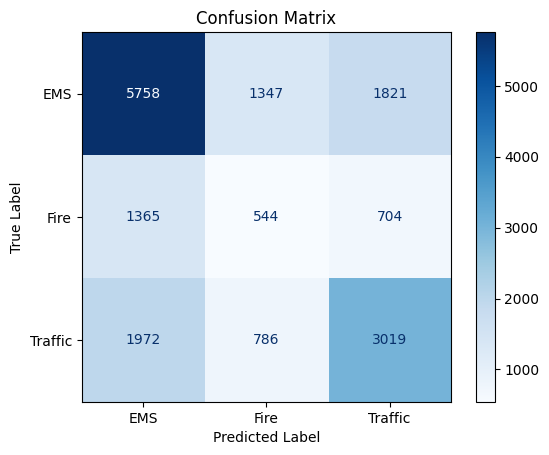

In [41]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
classes = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [42]:
# Generate a classification report
report = classification_report(y_pred, y_test)
# Print the classification report
print(report)

              precision    recall  f1-score   support

         EMS       0.65      0.63      0.64      9095
        Fire       0.21      0.20      0.21      2677
     Traffic       0.52      0.54      0.53      5544

    accuracy                           0.54     17316
   macro avg       0.46      0.46      0.46     17316
weighted avg       0.54      0.54      0.54     17316



#### Performance Analysis (Per Class):
 - EMS: Decent Performance
 - Fire: Poor performance (fire has the least amount of samples)
 - Traffic: Moderate Performance, balanced across all metrics so it supports the case of consistent predictions
 
 Need to remedy the class imbalances (especially fire)

 So essentially we need to focus on imbalanced classes, since fire is the most underperforming class (which is wild because fire is 100% the most critical emergency out of the three classes )

### Hyperparameter Tuning

In [43]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

In [44]:
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

In [45]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring=scoring,
    refit='recall',  # Refit model using recall as the primary metric
    n_jobs=-1,  # Use all available cores
    verbose=1,
    return_train_score=True
)

In [46]:
# Fit the grid search
grid_search.fit(X_train, y_train)

# Print best parameters and scores for each metric
print("Best Parameters (optimized for F1-score):", grid_search.best_params_)
print("\nBest Cross-Validation Scores:")
for metric in scoring:
    best_score = grid_search.cv_results_[f'mean_test_{metric}'][grid_search.best_index_]
    print(f"{metric.capitalize()}: {best_score:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters (optimized for F1-score): {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Best Cross-Validation Scores:
Accuracy: 0.5453
Recall: 0.4532
F1: 0.4541


In [47]:
# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [48]:
# Print detailed classification report
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred))


Test Set Classification Report:
              precision    recall  f1-score   support

         EMS       0.64      0.70      0.67      8926
        Fire       0.22      0.18      0.20      2613
     Traffic       0.55      0.51      0.53      5777

    accuracy                           0.56     17316
   macro avg       0.47      0.46      0.46     17316
weighted avg       0.55      0.56      0.55     17316



So the models overall accuracy improved a small amount from the first model redition. However it isn't by much so I can do some more parameter tuning to see if I can increase the F1 score even further.

In [49]:
# Display top 5 parameter combinations for F1-score
results = pd.DataFrame(grid_search.cv_results_)
top_results = results[['params', 'mean_test_accuracy', 'mean_test_recall', 'mean_test_f1']].sort_values(by='mean_test_f1', ascending=False).head()
print("\nTop 5 Parameter Combinations (sorted by F1-score):")
print(top_results)


Top 5 Parameter Combinations (sorted by F1-score):
                                                params  mean_test_accuracy  \
196  {'criterion': 'entropy', 'max_depth': None, 'm...            0.548715   
195  {'criterion': 'entropy', 'max_depth': None, 'm...            0.548340   
83   {'criterion': 'gini', 'max_depth': None, 'max_...            0.545322   
197  {'criterion': 'entropy', 'max_depth': None, 'm...            0.549538   
86   {'criterion': 'gini', 'max_depth': None, 'max_...            0.547719   

     mean_test_recall  mean_test_f1  
196          0.453112      0.454302  
195          0.452992      0.454216  
83           0.453210      0.454072  
197          0.453125      0.454022  
86           0.453115      0.453999  


### Custom Hyperparameter Tuning

Before I can attempt this round of custom tuning, I need to check on just how imbalances are my classes in "y_train"

In [54]:
y_train

9346         EMS
68843        EMS
24594        EMS
76075    Traffic
50133        EMS
          ...   
7217         EMS
63018    Traffic
88174    Traffic
1025         EMS
18150    Traffic
Name: EMT Reason, Length: 69260, dtype: object

In [50]:
class_counts = Counter(y_train)
print(class_counts)

Counter({'EMS': 35392, 'Traffic': 23477, 'Fire': 10391})


In [51]:
total_samples = len(y_train)
imbalance_ratios = {cls: count / total_samples for cls, count in class_counts.items()}
print("Class proportions:", imbalance_ratios)

# Or, relative to majority class
majority_count = max(class_counts.values())
relative_ratios = {cls: count / majority_count for cls, count in class_counts.items()}
print("Ratios relative to majority:", relative_ratios)

Class proportions: {'EMS': 0.5110020213687554, 'Traffic': 0.33896910193473867, 'Fire': 0.15002887669650591}
Ratios relative to majority: {'EMS': 1.0, 'Traffic': 0.6633419981916817, 'Fire': 0.2935974231464738}


So since the fire class is so underrepresented, we can try to give it more weight in the decision tree.

In [55]:
param_grid = {
    'class_weight': ['balanced', {'Fire':6, 'EMS':2, 'Traffic':1},
                                {'Fire': 10, 'EMS': 5, 'Traffic':1}],
    'criterion': ['gini', 'entropy'],
    'min_weight_fraction_leaf': [0.0, 0.01],
    'max_depth': [3, 5, 10, None]
}
cv = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='f1', verbose=3)
grid_search.fit(X_train, y_train)
print("Best parameters after custom tuning:", grid_search.best_params_)
print("Best F1 score after custom tuning:", grid_search.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END class_weight=balanced, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight=balanced, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/3] END class_weight=balanced, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/3] END class_weight=balanced, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight=balanced, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight=balanced, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight=balanced, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/3] END class_weight=balanced, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 3/3] END class_weight=balanced, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/3] END class_weight=balanced, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight=balanced, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight=balanced, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight=balanced, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.1s
[CV 2/3] END class_weight=balanced, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.1s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 3/3] END class_weight=balanced, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.1s
[CV 1/3] END class_weight=balanced, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight=balanced, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight=balanced, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight=balanced, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.2s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight=balanced, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.2s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 3/3] END class_weight=balanced, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.2s
[CV 1/3] END class_weight=balanced, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight=balanced, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight=balanced, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight=balanced, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/3] END class_weight=balanced, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/3] END class_weight=balanced, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight=balanced, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 2/3] END class_weight=balanced, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 3/3] END class_weight=balanced, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 1/3] END class_weight=balanced, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight=balanced, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/3] END class_weight=balanced, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight=balanced, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 2/3] END class_weight=balanced, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 3/3] END class_weight=balanced, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 1/3] END class_weight=balanced, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.1s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight=balanced, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.1s
[CV 3/3] END class_weight=balanced, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.1s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight=balanced, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 2/3] END class_weight=balanced, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 3/3] END class_weight=balanced, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight=balanced, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.2s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight=balanced, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.2s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 3/3] END class_weight=balanced, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.2s
[CV 1/3] END class_weight=balanced, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight=balanced, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight=balanced, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 2/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 2/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 3/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.1s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.1s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 3/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.1s
[CV 1/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 2/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 2/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 3/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.2s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.2s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 3/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.2s
[CV 1/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 6, 'EMS': 2, 'Traffic': 1}, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 1/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 1/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 3/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.1s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.1s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 3/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.1s
[CV 1/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=gini, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 1/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=3, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 1/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=5, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.1s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 3/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.0;, score=nan total time=   0.1s
[CV 1/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=10, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 1/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.2s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.2s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 3/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.0;, score=nan total time=   0.2s
[CV 1/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s


c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JosephMoffatt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 li

[CV 2/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.0s
[CV 3/3] END class_weight={'Fire': 10, 'EMS': 5, 'Traffic': 1}, criterion=entropy, max_depth=None, min_weight_fraction_leaf=0.01;, score=nan total time=   0.1s
Best parameters after custom tuning: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_weight_fraction_leaf': 0.0}
Best F1 score after custom tuning: nan


Since this is just a smaller scale project, I won't test out any more models for prediction. I am saving that technique for a passion project of mine (Hopefully coming soon)! But you can see the structure though!